## In this jupyter notebook, WaPOR data needed for Water Productivity assessment will be  downloaded in bulk and corrected to the right unit

**=====================================================================================================================**
**Data layers for Water Productivity assessment:**

| No.  | WaPOR Data | Spatial resolution | Temporal resolution | Temporal coverage |
| :-: | :-: | :-: | :-: | :-: |
| 1 |Actual Evapotranspiration & interception (AETI)  | 100 m | Dekadal | 2009-2019 |
| 2  | Transpiration (T)  | 100 m | Dekadal  | 2009-2019 |
| 3  | Net Primary Production (NPP) | 100 m | Dekadal | 2009-2019 |
| 4  | Land cover classification (LCC)  | 100 m | Annual | 2009-2019 |
| 5  | Precipitation (PCP)  | 5 km | Dekadal | 2009-2019 |
| 6  | Reference Evapotranspiration (RET) | 20 km | Dekadal  | 2009-2019 |

**=====================================================================================================================**

## 1 Import modules/libraries

In [1]:
import os                     # module for interacting with the operating system
import shapefile             # module foe reading shapefile
import matplotlib.pyplot as plt # module for plotting
os.chdir(os.path.join(os.path.split(os.getcwd())[0], "Modules"))  #change working directory to 'Modules' folder
import WaPOR                  # Import local module in 'Modules' folder

Loading WaPOR catalog...


**Get WaPOR API Token: https://wapor.apps.fao.org/profile**
![title](img/Fig0.gif)

## 2 Read geographical extent of the study area

**Study area: Xinavane, Mozambique**

In [2]:
roi_shapefile=r"..\Data\1ShapeTif\Shapefile\Xinavane_1.shp" #path to the shapefile of study area
shape=shapefile.Reader(roi_shapefile) #read shapefile
xmin,ymin,xmax,ymax=shape.bbox #read shapefile extent
print('Extent of study area: lonlim = [{0},{2}], latlim = [{1},{3}]'.format(xmin,ymin,xmax,ymax))

Extent of study area: lonlim = [32.65692516077674,32.90420244933813], latlim = [-25.16412729789142,-25.01450956754679]


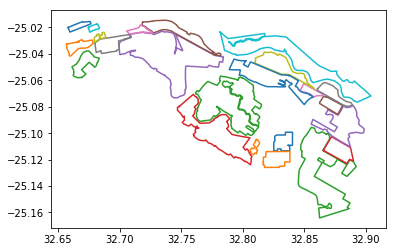

In [3]:
##plot to check shapefile
plt.figure()
sf=shape
for shape in sf.shapeRecords(): #loop over all features in shapefile
    for i in range(len(shape.shape.parts)): #loop over all points in feature
        i_start = shape.shape.parts[i]
        if i==len(shape.shape.parts)-1:
            i_end = len(shape.shape.points)
        else:
            i_end = shape.shape.parts[i+1]
        x = [i[0] for i in shape.shape.points[i_start:i_end]]
        y = [i[1] for i in shape.shape.points[i_start:i_end]]
        plt.plot(x,y)
plt.show()

## 3 Bulk-download WaPOR data for the study area extent

In [3]:
output_dir=r'..\Data' # folder to save data

## Land cover classification (Annual)

In [5]:
WaPOR.LCC_yearly(output_dir, Startdate='2009-01-01', Enddate='2019-12-31', 
         latlim=[ymin, ymax], lonlim=[xmin, xmax],level=2, 
         version = 2, Waitbar = 1)


Download yearly WaPOR Land Cover Class data for the period 2009-01-01 till 2019-12-31
Progress: |██████████████████████████████████████████████████| 100.0% Complete


## Reference Evapotranspiration (Dekadal)

In [ ]:
WaPOR.RET_dekadal(output_dir, Startdate='2009-01-01', Enddate='2019-12-31', 
         latlim=[ymin-0.5, ymax+0.5], lonlim=[xmin-0.5, xmax+0.5],level=1, 
         version = 2, Waitbar = 1)


Download dekadal WaPOR Reference Evapotranspiration data for the period 2009-01-01 till 2019-12-31
Progress: |--------------------------------------------------| 1.3% Complete

## Precipitation (Dekadal) 

In [ ]:
WaPOR.PCP_dekadal(output_dir, Startdate='2009-01-01', Enddate='2019-12-31', 
         latlim=[ymin-0.05, ymax+0.05], lonlim=[xmin-0.05, xmax+0.05],level=1, 
         version = 2, Waitbar = 1)


Download dekadal WaPOR Precipitation data for the period 2009-01-01 till 2019-12-31
Progress: |████████████████████████████----------------------| 56.3% Complete

## Actual evapotranspiration & interception (Dekadal)

In [ ]:
WaPOR.AET_dekadal(output_dir, Startdate='2009-01-01', Enddate='2019-12-31', 
         latlim=[ymin, ymax], lonlim=[xmin, xmax],level=2, 
         version = 2, Waitbar = 1)

## Transpiration (Dekadal)

In [ ]:
WaPOR.T_dekadal(output_dir, Startdate='2009-01-01', Enddate='2019-12-31', 
         latlim=[ymin, ymax], lonlim=[xmin, xmax],level=2, 
         version = 2, Waitbar = 1)

## Net Primary Production (Dekadal)

In [ ]:
WaPOR.NPP_dekadal(output_dir, Startdate='2009-01-01', Enddate='2019-12-31', 
         latlim=[ymin, ymax], lonlim=[xmin, xmax],level=2, 
         version = 2, Waitbar = 1)